# Load the Cleaned DataSet


In [ ]:
# code to load cleaned dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/heart_disease_detection/heart_dataset_cleaned.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
2,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
3,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
4,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0


# data preprocessing part 2

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# splitting the data into depentent and indepenten features
X = df.drop('target', axis=1)
y = df['target']

# splitting the data into 80% train and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(x_train)
X_test_scaled = sc.transform(x_test)

In [ ]:
from collections import Counter
# count the values for the test and train
print(f'total unique label', y_test.unique())
print(f'total rows in training data', Counter(y_train))
print(f'total rows in test data', Counter(y_test))

total unique label [1 0]
total rows in training data Counter({1: 101, 0: 81})
total rows in test data Counter({1: 31, 0: 15})


# model building and evaluation

## 1. LogisticRegression Model


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

# Instantiate and train the model
LR = LogisticRegression()
LR_model = LR.fit(X_train_scaled, y_train)
LR_model_predict = LR_model.predict(X_test_scaled)

# Evaluate the model
LR_model_cm = confusion_matrix(y_test, LR_model_predict)
LR_model_acc = accuracy_score(y_test, LR_model_predict)
LR_model_cr = classification_report(y_test, LR_model_predict)

print(f"Confusion Matrix:\n{LR_model_cm}")
print(f"Accuracy: {LR_model_acc:.2f}")
print(f"Classification Report:\n{LR_model_cr}")

Confusion Matrix:
[[13  2]
 [ 5 26]]
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.93      0.84      0.88        31

    accuracy                           0.85        46
   macro avg       0.83      0.85      0.83        46
weighted avg       0.86      0.85      0.85        46



## 2. KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the model
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train_scaled, y_train)
knn_model_predict = knn_model.predict(X_test_scaled)

# Evaluate the model
knn_model_cm = confusion_matrix(y_test, knn_model_predict)
knn_model_acc = accuracy_score(y_test, knn_model_predict)
knn_model_cr = classification_report(y_test, knn_model_predict)

print(f"Confusion Matrix:\n{knn_model_cm}")
print(f"Accuracy: {knn_model_acc:.2f}")
print(f"Classification Report:\n{knn_model_cr}")

Confusion Matrix:
[[12  3]
 [ 3 28]]
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.90      0.90      0.90        31

    accuracy                           0.87        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.87      0.87      0.87        46



## 3. SVC model

In [ ]:
from sklearn.svm import SVC

# Instantiate and train the model
svc = SVC()
svc_model = svc.fit(X_train_scaled, y_train)
svc_model_predict = svc_model.predict(X_test_scaled)

# Evaluate the model
svc_model_cm = confusion_matrix(y_test, svc_model_predict)
svc_model_acc = accuracy_score(y_test, svc_model_predict)
svc_model_cr = classification_report(y_test, svc_model_predict)

print(f"Confusion Matrix:\n{svc_model_cm}")
print(f"Accuracy: {svc_model_acc:.2f}")
print(f"Classification Report:\n{svc_model_cr}")

Confusion Matrix:
[[11  4]
 [ 4 27]]
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.87      0.87      0.87        31

    accuracy                           0.83        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.83      0.83      0.83        46



## 4. XGB model

In [ ]:
from xgboost import XGBClassifier

# Instantiate and train the model
xgb = XGBClassifier()
xgb_model = xgb.fit(X_train_scaled, y_train)
xgb_model_predict = xgb_model.predict(X_test_scaled)

# Evaluate the model
xgb_model_cm = confusion_matrix(y_test, xgb_model_predict)
xgb_model_acc = accuracy_score(y_test, xgb_model_predict)
xgb_model_cr = classification_report(y_test, xgb_model_predict)

print(f"Confusion Matrix:\n{xgb_model_cm}")
print(f"Accuracy: {xgb_model_acc:.2f}")
print(f"Classification Report:\n{xgb_model_cr}")

Confusion Matrix:
[[13  2]
 [ 2 29]]
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.94      0.94      0.94        31

    accuracy                           0.91        46
   macro avg       0.90      0.90      0.90        46
weighted avg       0.91      0.91      0.91        46



## 5. RFC model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train_scaled, y_train)
rfc_model_predict = rfc_model.predict(X_test_scaled)

# Evaluate the model
rfc_model_cm = confusion_matrix(y_test, rfc_model_predict)
rfc_model_acc = accuracy_score(y_test, rfc_model_predict)
rfc_model_cr = classification_report(y_test, rfc_model_predict)

print(f"Confusion Matrix:\n{rfc_model_cm}")
print(f"Accuracy: {rfc_model_acc:.2f}")
print(f"Classification Report:\n{rfc_model_cr}")

Confusion Matrix:
[[12  3]
 [ 4 27]]
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.90      0.87      0.89        31

    accuracy                           0.85        46
   macro avg       0.82      0.84      0.83        46
weighted avg       0.85      0.85      0.85        46



# Stacking of the models

In [ ]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import cross_val_score

# Instantiate and train the model
knn = KNeighborsClassifier()
lr = LogisticRegression()
svc = SVC()
xgb = XGBClassifier()
scv=StackingCVClassifier(classifiers=[lr,knn,svc],meta_classifier= xgb,random_state=42)
print("3-fold cross-validation:")
for clf, label in zip([knn, lr, svc, scv], ['KNN', 'Logistic Regression', 'Support Vector Classifier', 'StackingClassifier']):
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy')
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f}) [{label}]")

3-fold cross-validation:
Accuracy: 0.83 (+/- 0.02) [KNN]
Accuracy: 0.80 (+/- 0.02) [Logistic Regression]
Accuracy: 0.79 (+/- 0.05) [Support Vector Classifier]
Accuracy: 0.79 (+/- 0.03) [StackingClassifier]


# Hyper parameters optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])

params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(x_train, y_train)
gs_knn.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

In [ ]:
# find best model score
gs_knn.score(x_train, y_train)

1.0

- 100% accuracy

## train with best params

In [ ]:
# Define the pipeline with the best parameters
knn_pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance', leaf_size=15))
])

# Fit the pipeline on your training data
knn_pipe.fit(x_train, y_train)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(leaf_size=15, n_neighbors=3,
                                      weights='distance'))])

In [ ]:
knn_pipe_predict = knn_pipe.predict(x_test)

# Evaluate the model
knn_pipe_cm = confusion_matrix(y_test, knn_pipe_predict)
knn_pipe_acc = accuracy_score(y_test, knn_pipe_predict)
knn_pipe_cr = classification_report(y_test, knn_pipe_predict)

print(f"Confusion Matrix:\n{knn_pipe_cm}")
print(f"Accuracy: {knn_pipe_acc:.2f}")
print(f"Classification Report:\n{knn_pipe_cr}")

Confusion Matrix:
[[12  3]
 [ 4 27]]
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.90      0.87      0.89        31

    accuracy                           0.85        46
   macro avg       0.82      0.84      0.83        46
weighted avg       0.85      0.85      0.85        46



# All model comparison

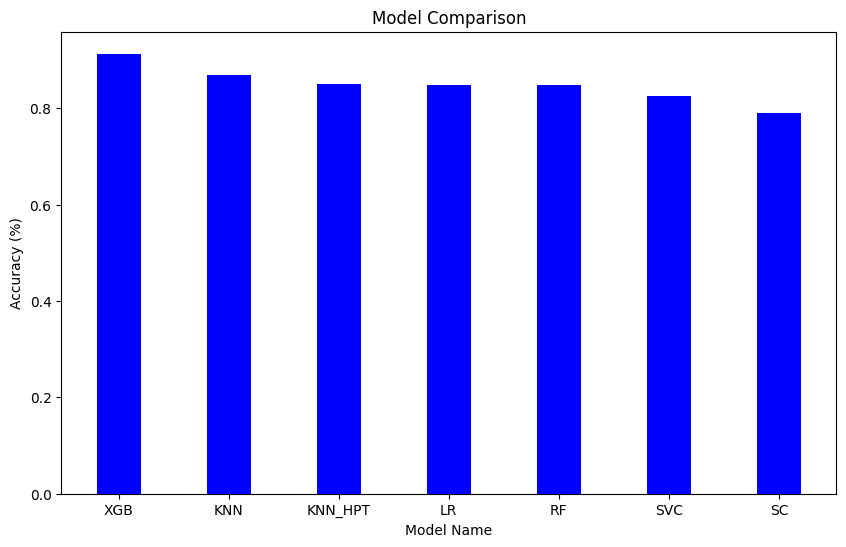

In [ ]:
import matplotlib.pyplot as plt
model_names = ['LR', 'KNN', 'SVC', 'XGB', 'RF', 'SC', 'KNN_HPT']
accuracies = [LR_model_acc, knn_model_acc, svc_model_acc, xgb_model_acc, rfc_model_acc, 0.79, 0.85]

# Sort the model names and accuracies in descending order of accuracy
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i], reverse=True)
model_names_sorted = [model_names[i] for i in sorted_indices]
accuracies_sorted = [accuracies[i] for i in sorted_indices]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names_sorted, accuracies_sorted, color='blue', width=0.4)
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.show()


# Save the models

In [ ]:
import pickle
model_path = "/content/drive/MyDrive/heart_disease_detection/saved_models"

# function to save the model
def save_model(model, model_name):
  model_path_full = model_path + "/" + model_name
  return pickle.dump(model, open(model_path_full, "wb"))


# calling the function to save the model

In [ ]:
model_name = "LogisticRegression_model.sav"
save_model(LR_model, model_name)

In [ ]:
model_name = "KNeighborsClassifier.sav"
save_model(knn_model, model_name)

In [ ]:
model_name = "SVC.sav"
save_model(svc_model, model_name)

In [ ]:
model_name = "XGBClassifier.sav"
save_model(xgb_model, model_name)

In [ ]:
model_name = "RandomForestClassifier.sav"
save_model(rfc_model, model_name)

In [ ]:
model_name = "knn_hyper_opt.sav"
save_model(knn_pipe, model_name)

# load models

In [ ]:
# function to load the model
def load_model(model_name):
  model_path_full = model_path + "/" + model_name
  loaded_model = pickle.load(open(model_path_full, 'rb'))
  result = loaded_model.score(X_test_scaled, y_test)
  return result

In [ ]:
model_name = "LogisticRegression_model.sav"
load_model(model_name)

0.8478260869565217

In [ ]:
model_name = "KNeighborsClassifier.sav"
load_model(model_name)

0.8695652173913043

In [ ]:
model_name = "SVC.sav"
load_model(model_name)

0.8260869565217391

In [ ]:
model_name = "XGBClassifier.sav"
load_model(model_name)

0.9130434782608695

In [ ]:
model_name = "RandomForestClassifier.sav"
load_model(model_name)

0.8478260869565217

In [ ]:
model_name = "/content/drive/MyDrive/heart_disease_detection/saved_models/knn_hyper_opt.sav"
loaded_model = pickle.load(open(model_name, 'rb'))
result = loaded_model.score(x_test, y_test)
result

0.8478260869565217

# predict the values from test set

In [ ]:
model_name = "/content/drive/MyDrive/heart_disease_detection/saved_models/XGBClassifier.sav"
loaded_model = pickle.load(open(model_name, 'rb'))

- test 1

In [ ]:
X_test_scaled[0]

array([-1.13390072,  0.69258559, -0.89656442, -0.87158439,  1.36472679,
        0.        ,  0.88608528,  1.40692335, -0.68391661,  0.26451962,
       -0.88571465, -0.71300487, -0.60936788])

In [ ]:
X_test_scaled[0].reshape(1,-1)

array([[-1.13390072,  0.69258559, -0.89656442, -0.87158439,  1.36472679,
         0.        ,  0.88608528,  1.40692335, -0.68391661,  0.26451962,
        -0.88571465, -0.71300487, -0.60936788]])

In [ ]:
y_test.iloc[0]

1

In [ ]:
input = X_test_scaled[0]
input = input.reshape(1,-1)
result = loaded_model.predict(input)
result[0]

1

- test 2

In [ ]:
y_test.iloc[-1]

0

In [ ]:
X_test_scaled[-1].reshape(1,-1)

array([[ 0.49877278,  0.69258559, -0.89656442, -1.82335454, -0.17537377,
         0.        ,  0.88608528,  0.2534997 , -0.68391661, -0.80748094,
         0.92552205,  0.682338  ,  1.1794217 ]])

In [ ]:
input = X_test_scaled[-1]
input = input.reshape(1,-1)
result = loaded_model.predict(input)
result[0]

0

- The model is predicting accurately.